# グラフ埋め込み

- 隣接行列をベクトルとして扱う
- DeepWalk & Node2Vec
- Variational Graph Auto Encoder

In [1]:
import numpy as np
import networkx as nx

%matplotlib inline

In [2]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

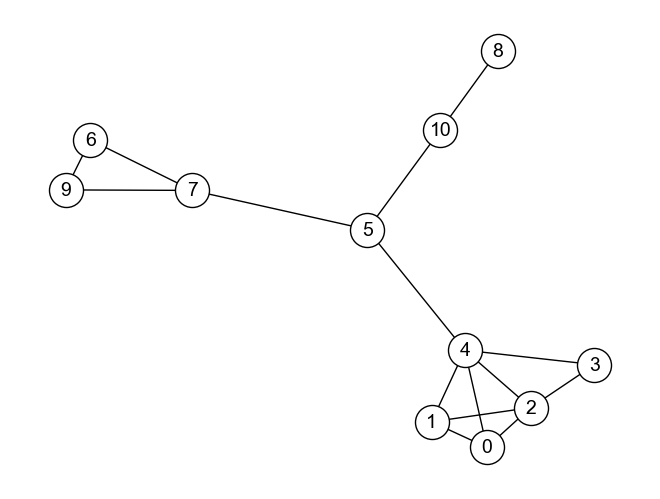

In [3]:
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
G.add_edges_from([
    (0, 1), (0, 2), (0, 4), (1, 2), (1, 4), (2, 3), (2, 4),
    (3, 4), (4, 5), (5, 7), (7, 6),  (7, 9), #(7, 8),
    (6, 9), #(8, 9)  #(7, 10), (8, 10), (9, 10)
    (5, 10), (8, 10) ##
])

pos = nx.spring_layout(G, seed=12345)
nx.draw(G, pos, **DRAW_CONFIG)

In [4]:
# G = nx.Graph()
# G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# G.add_edges_from([
#     (0, 4), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5),
#     (5, 6), (6, 7), (6, 8), (6, 9)
# ])

# pos = nx.spring_layout(G, seed=12345)
# nx.draw(G, pos, **DRAW_CONFIG)

## 隣接関係をベクトルとして見なす

In [5]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]])

In [6]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [7]:
cosine_similarity(A[0, :], A[1, :])

0.6666666666666667

In [8]:
cosine_similarity(A[3, :], A[6, :])

0.0

In [9]:
cosine_similarity(A[4, :], A[0, :])

0.5163977794943222

In [10]:
cosine_similarity(A[4, :], A[5, :])

0.0

## 主成分分析による次元圧縮

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(A)

X_pca

array([[ 0.82176305, -0.40901342,  0.39857846],
       [ 0.82176305, -0.40901342,  0.39857846],
       [ 1.10743642,  0.06668467, -0.89279238],
       [ 0.40899195, -0.57504345,  0.71816885],
       [ 1.14011095,  1.12498342, -0.29774625],
       [-0.473605  , -1.07059121, -0.37931591],
       [-0.95425725, -0.08116414, -0.35125259],
       [-0.92158272,  0.97713461,  0.24379354],
       [-0.51451886, -0.30055582, -0.04090287],
       [-0.95425725, -0.08116414, -0.35125259],
       [-0.48184433,  0.75774292,  0.55414326]])

In [12]:
cosine_similarity(X_pca[0, :], X_pca[1, :])

1.0000000000000002

In [13]:
cosine_similarity(X_pca[3, :], X_pca[6, :])

-0.5801718116282029

In [14]:
cosine_similarity(X_pca[4, :], X_pca[0, :])

0.21964543659003524

In [15]:
cosine_similarity(X_pca[4, :], X_pca[5, :])

-0.8137570873782712

## スペクトラルクラスタリング

In [16]:
A

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]])

In [17]:
D = np.diag([degree[1] for degree in G.degree])
D

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [18]:
L = D - A
#L = nx.laplacian_matrix(G).toarray()

L

array([[ 3, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0],
       [-1,  3, -1,  0, -1,  0,  0,  0,  0,  0,  0],
       [-1, -1,  4, -1, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1,  5, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  3,  0, -1,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  2, -1,  0, -1,  0],
       [ 0,  0,  0,  0,  0, -1, -1,  3,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  0,  2,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  2]])

In [19]:
# first-order proximityの最小化問題なので，固有値が小さいもの順に固有ベクトルを選択する
# なお，固有値がゼロということはすべての要素が同じになっている状態なので，無視をする
# https://qiita.com/sakami/items/9b3d57d4be3ff1c70e1d
np.linalg.eig(L).eigenvalues

array([6.16583081e+00, 1.02194404e-15, 2.13987130e-01, 3.35683867e-01,
       5.00000000e+00, 4.32980856e+00, 4.00000000e+00, 2.00000000e+00,
       1.84396522e+00, 3.11072441e+00, 3.00000000e+00])

In [20]:
target_components = np.linalg.eig(L).eigenvalues.argsort()[1:4]
target_components 

array([2, 3, 8])

In [21]:
X_sc = np.linalg.eig(L).eigenvectors[:, target_components]
X_sc

array([[ 0.32692869,  0.08228413,  0.09050501],
       [ 0.32692869,  0.08228413,  0.09050501],
       [ 0.32692869,  0.08228413,  0.09050501],
       [ 0.32692869,  0.08228413,  0.09050501],
       [ 0.25697015,  0.05466268, -0.07638308],
       [-0.07785228, -0.07417253, -0.60308768],
       [-0.41008991,  0.32241662,  0.20267405],
       [-0.32233594,  0.21418656, -0.17104985],
       [-0.19278521, -0.70217819,  0.53290988],
       [-0.41008991,  0.32241662,  0.20267405],
       [-0.15153165, -0.4664683 , -0.4497574 ]])

In [22]:
cosine_similarity(X_sc[0, :], X_sc[1, :])

1.0

In [23]:
cosine_similarity(X_sc[3, :], X_sc[6, :])

-0.456600786824283

In [24]:
cosine_similarity(X_sc[4, :], X_sc[0, :])

0.8543810232983579

In [25]:
cosine_similarity(X_sc[4, :], X_sc[5, :])

0.13129310460138233

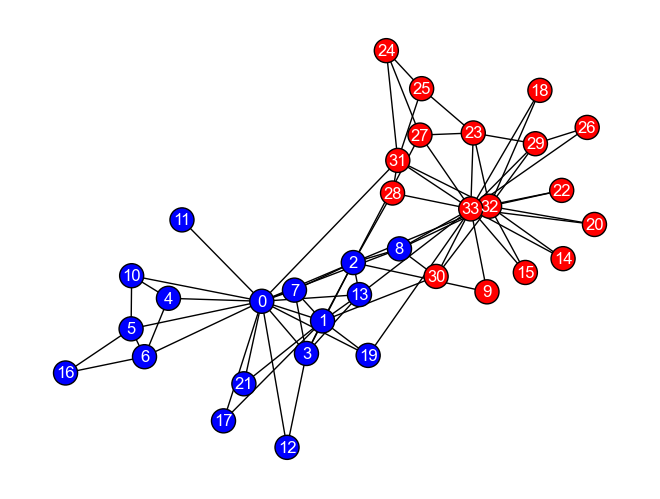

In [26]:
KARATE_DRAW_CONFIG = {
    'edgecolors': 'black', # line color of nodes
    'font_color': 'white',
    'with_labels': True,
    'node_size': 300,
    'font_size': 12,
    'font_family': 'Arial',
}

G_karate = nx.karate_club_graph()
color_list = ['blue' if G_karate.nodes[v]['club'] == 'Mr. Hi' else 'red' for v in G_karate.nodes()]
pos = nx.spring_layout(G_karate, seed=123)
nx.draw(G_karate, pos, **KARATE_DRAW_CONFIG, node_color=color_list)

In [322]:
L = nx.laplacian_matrix(G_karate).toarray()
#L = nx.normalized_laplacian_matrix(G_karate).toarray()

dim = 2
target_component_idx = np.linalg.eig(L).eigenvalues.argsort()[1:dim+1]
X_sc = np.linalg.eig(L).eigenvectors[:, target_component_idx]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_sc)
clusters_predicted = kmeans.labels_



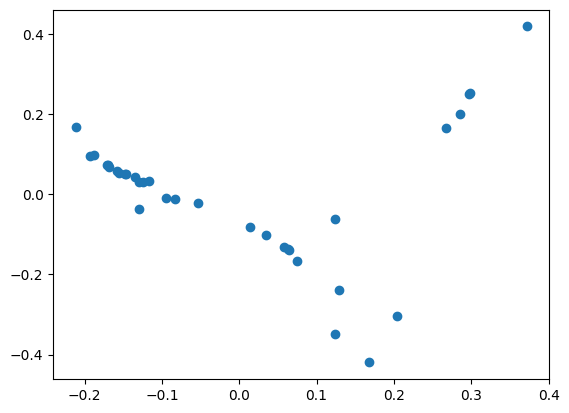

In [323]:
import matplotlib.pyplot as plt

# 色分け
colors = {0: 'red', 1: 'blue', 2: 'limegreen'}
clusters_predicted = [colors[c] for c in clusters_predicted]

#plt.scatter(X_sc[:, 0], X_sc[:, 1], c=clusters_predicted)
plt.scatter(X_sc[:, 0], X_sc[:, 1])

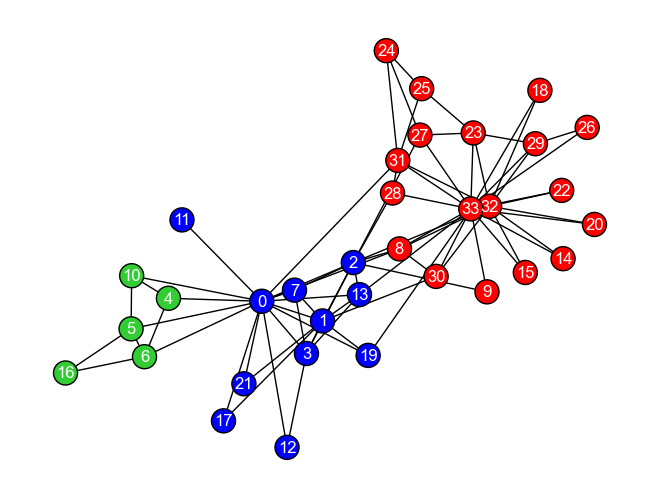

In [312]:
pos = nx.spring_layout(G_karate, seed=123)
nx.draw(G_karate, pos, **KARATE_DRAW_CONFIG, node_color=clusters_predicted)

## DeepWalk

In [30]:
paths = list(nx.generate_random_paths(G, sample_size=1000, path_length=80))
#paths[:5]

In [31]:
from gensim.models import Word2Vec

model = Word2Vec(paths, vector_size=128, window=10, min_count=5, epochs=3)
cosine_similarity(model.wv[4], model.wv[5])

-0.12679622

### Node2Vec

In [32]:
from torch_geometric.nn import Node2Vec

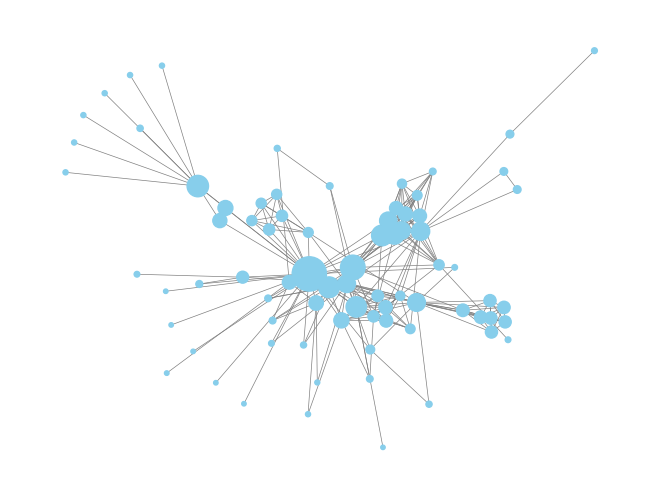

In [268]:
LESMIZ_DRAW_CONFIG = {
#    'node_color': 'skyblue',
    'edge_color': 'gray', # line color of nodes
    'font_color': 'black',
    'width': 0.5,
    'with_labels': False,
#    'node_size': 100,
    'font_size': 6,
    'font_family': 'Arial',
}

G_lesmiz = nx.les_miserables_graph()
pagerank = nx.pagerank(G_lesmiz)

# PageRankが大きいノードはノードの大きさを大きくする
node_size = [600 * (pagerank[node] - min(pagerank.values())) / (max(pagerank.values()) - min(pagerank.values()))  + 10 for node in pagerank.keys()]

seed_id = 777
pos_spring = nx.spring_layout(G_lesmiz, seed=seed_id)
pos = nx.forceatlas2_layout(G_lesmiz, seed=seed_id)
nx.draw(G_lesmiz, pos_spring, **LESMIZ_DRAW_CONFIG, node_size=node_size, node_color='skyblue')


Epoch: 0, Train-loss: 3.6208
Epoch: 20, Train-loss: 1.6550
Epoch: 40, Train-loss: 1.2556
Epoch: 60, Train-loss: 1.1668
Epoch: 80, Train-loss: 1.0198
Epoch: 100, Train-loss: 0.9875
Epoch: 120, Train-loss: 0.9320
Epoch: 140, Train-loss: 0.9347
Epoch: 160, Train-loss: 0.9153
Epoch: 180, Train-loss: 0.8880


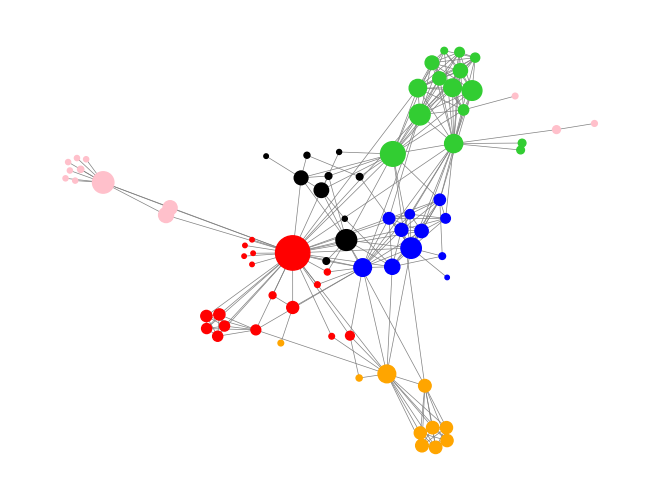

In [298]:
import torch
import torch_geometric
from torch_geometric.nn import Node2Vec

lesmiz_dataset = torch_geometric.utils.convert.from_networkx(G_lesmiz)


device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(seed_id)

model = Node2Vec(
    lesmiz_dataset.edge_index,
    embedding_dim=16,
    walks_per_node=10,
    walk_length=4,
    context_size=2,
    p=1.0,
    q=0.5,
    num_negative_samples=1
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loader = model.loader(batch_size=32, shuffle=True, num_workers=0)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(200):
    train_loss = train()
    if epoch % 20 == 0:
        print(f'Epoch: {epoch}, Train-loss: {train_loss:.4f}')

model.eval() 
X_n2v = model().detach().numpy()


from sklearn import preprocessing
kmeans = KMeans(n_clusters=6, random_state=seed_id, n_init="auto").fit(preprocessing.normalize(X_n2v))
#kmeans = KMeans(n_clusters=6, random_state=seed_id, n_init="auto").fit(X_n2v)
clusters_predicted = kmeans.labels_

colors = {0: 'red', 1: 'blue', 2: 'limegreen', 3: 'orange', 4: 'pink', 5: 'black', 6: 'gold'}
clusters_predicted = [colors[c] for c in clusters_predicted]

nx.draw(G_lesmiz, pos, **LESMIZ_DRAW_CONFIG, node_color=clusters_predicted, node_size=node_size)


Epoch: 1, Train-loss: 3.7201
Epoch: 2, Train-loss: 3.5061
Epoch: 3, Train-loss: 3.3096


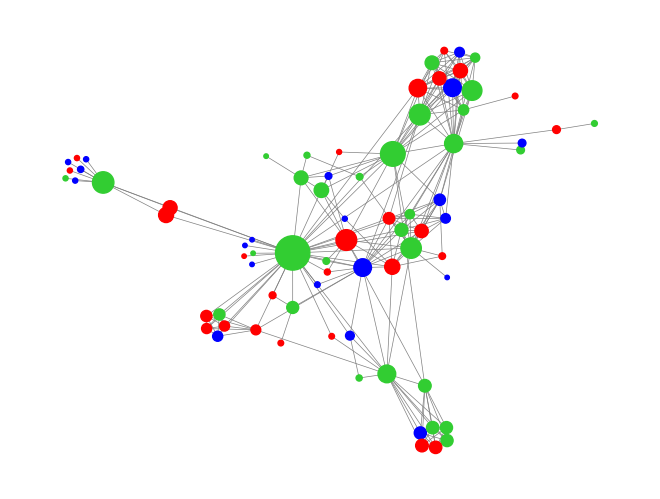

In [308]:
import torch
import torch_geometric
from torch_geometric.nn import Node2Vec

lesmiz_dataset = torch_geometric.utils.convert.from_networkx(G_lesmiz)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(seed_id)

model = Node2Vec(
    lesmiz_dataset.edge_index,
    embedding_dim=16,
    walks_per_node=10,
    walk_length=7,
    context_size=2,
    p=1.0,
    q=5.0,
    num_negative_samples=1
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loader = model.loader(batch_size=32, shuffle=True, num_workers=0)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(3):
    train_loss = train()
    print(f'Epoch: {epoch+1}, Train-loss: {train_loss:.4f}')

model.eval() 
X_n2v = model().detach().numpy()


from sklearn import preprocessing
#kmeans = KMeans(n_clusters=3, random_state=seed_id, n_init="auto").fit(X_n2v)
kmeans = KMeans(n_clusters=3, random_state=seed_id, n_init="auto").fit(preprocessing.normalize(X_n2v))


clusters_predicted = kmeans.labels_

colors = {0: 'red', 1: 'blue', 2: 'limegreen'}
clusters_predicted = [colors[c] for c in clusters_predicted]

nx.draw(G_lesmiz, pos, **LESMIZ_DRAW_CONFIG, node_color=clusters_predicted, node_size=node_size)


In [266]:
import torch
import torch_geometric
from torch_geometric.nn import Node2Vec
from torch_geometric.transforms import RandomNodeSplit

club_idx = {'Mr. Hi': 0, 'Officer': 1}
club_labels = [club_idx[G_karate.nodes[v]['club']] for v in G_karate.nodes()]

dataset = torch_geometric.utils.convert.from_networkx(G_karate)
dataset.y = torch.tensor(club_labels, dtype=torch.long)

In [267]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='local/data', name='Cora', split='full')._data

In [170]:
node_splitter = RandomNodeSplit(
    split='train_rest',
    num_splits=1,
    num_val=0.0,
    num_test=0.3,
    key='y'
)

splitted_dataset = node_splitter(dataset)

In [174]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Node2Vec(
    splitted_dataset.edge_index,
    embedding_dim=16,
    walks_per_node=10,
    walk_length=40,
    context_size=10,
    p=1.0,
    q=0.25,
    num_negative_samples=1,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loader = model.loader(batch_size=128, shuffle=True, num_workers=0)


def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def test():
    model.eval()
    z = model()
    accuracy = model.test(
        train_z=z[splitted_dataset.train_mask],
        train_y=splitted_dataset.y[splitted_dataset.train_mask],
        test_z=z[splitted_dataset.test_mask],
        test_y=splitted_dataset.y[splitted_dataset.test_mask],
        max_iter=150,
    )
    return accuracy
    
for epoch in range(1, 11):
    print(f'Epoch: {epoch}, Train-loss: {train():.4f}, Test-accuracy: {test():.4f}')


X_n2v = model().detach().numpy()
#X_n2v = model.embedding(torch.tensor([0, 1, 2, 3]))


Epoch: 1, Train-loss: 3.6806, Test-accuracy: 0.4000
Epoch: 2, Train-loss: 3.6660, Test-accuracy: 0.4000
Epoch: 3, Train-loss: 3.6018, Test-accuracy: 0.4000
Epoch: 4, Train-loss: 3.4880, Test-accuracy: 0.4000
Epoch: 5, Train-loss: 3.4358, Test-accuracy: 0.4000
Epoch: 6, Train-loss: 3.4218, Test-accuracy: 0.4000
Epoch: 7, Train-loss: 3.3183, Test-accuracy: 0.4000
Epoch: 8, Train-loss: 3.2712, Test-accuracy: 0.4000
Epoch: 9, Train-loss: 3.2080, Test-accuracy: 0.4000
Epoch: 10, Train-loss: 3.1209, Test-accuracy: 0.4000


In [175]:
cosine_similarity(X_n2v[33, :], X_n2v[32, :])

0.45870718

---

## クイズ

### Q1: ランダムウォーク

以下のグラフ$G_{maze}$において，任意のノードからスタートし，ランダムウォークを$k$ステップしたときの経路を得る関数`get_random_walk_path`を定義しなさい．
なお，このクイズではNetworkxの`generate_random_paths`関数は用いないこと．

※ ヒント: あるノードに隣接するノードのリストを得るには，Networkxのグラフオブジェクトの`neighbors`メソッドを用いればよい．
またリストからランダムに要素を取得するには`random`パッケージの`choice`メソッドを用いればよい．

In [ ]:
G_maze = nx.sedgewick_maze_graph()
G_maze.add_edges_from([(3, 8), (3, 9), (8, 9)])
pos = nx.spring_layout(G_maze, seed=123)
nx.draw(G_maze, pos, **DRAW_CONFIG)

In [ ]:
# Write your code
def get_random_walk_path(G, node_from, length):
    ''' node_from: グラフG上でランダムウォークを開始するノード
        length: ランダムウォークして得る経路の長さ
    '''


# グラフを定義
G_maze = nx.sedgewick_maze_graph()

# 定義した関数を用いて経路を得る
# get_random_walk_path(G_maze, node_from=1, length=10)

In [ ]:
import random

# Write your code
def get_random_walk_path(G, node_from, length):
    ''' node_from: グラフG上でランダムウォークを開始するノード
        length: ランダムウォークして得る経路の長さ
    '''
    # 生成する経路を保存するリスト
    path = []

    # 始点ノードを追加
    path.append(node_from)

    for i in range(length):
        last_node = path[-1] # 最後に訪問したノード

        # 次に移動するノードを隣接ノードから選択
        adjacent_nodes = list(G.neighbors(last_node))
        next_node = random.choice(adjacent_nodes)

        # 経路に追加
        path.append(next_node)

    return path
        
    


# グラフを定義
G_maze = nx.sedgewick_maze_graph()

# 定義した関数を用いて経路を得る
path = get_random_walk_path(G_maze, node_from=1, length=5)
path

### Q2: node2vecのためのランダムウォーク

クイズQ1で定義した`get_random_walk_path`関数を改良し，node2vecアルゴリズムに従うランダムウォーク経路を生成する関数`get_random_walk_path_for_n2v`を定義しなさい．
なお，関数`get_random_walk_path_for_n2v`のパラメータには以下を設定しなさい．
- G: グラフ
- node_from: 経路の始点となるノード
- length: 経路の長さ
- p: Returnパラメータ（float型）
- q: In-outパラメータ（float型）

※ ヒント: 指定した重み（確率分布）に従ってリストから要素を取得するには，`random`パッケージの`choices`関数を用いる（[参考](https://docs.python.org/ja/3.13/library/random.html#random.choices)）．

In [ ]:
import random

# Write your code
def get_random_walk_path_for_n2v(G, node_from, length, p: float=1, q: float=1):
    ''' node_from: グラフG上でランダムウォークを開始するノード
        length: ランダムウォークして得る経路の長さ
    '''
    # 生成する経路を保存するリスト
    path = []

    # 始点ノードを追加
    path.append(node_from)

    for i in range(length):
        node_v = path[-1] # 最後に訪問したノード        
        
        if len(path) >= 2:
            node_t = path[-2] # node_vの前に訪問したノード
            neighbors_v = list(G.neighbors(node_v))
            neighbors_t = list(G.neighbors(node_t))
    
            # 次に移動するノードを選択するための確率分布を定義
            weights = []
            for neighbor_v in neighbors_v:
                if neighbor_v == node_t:
                    weights.append(1 / p)
                else:
                    if neighbor_v in neighbors_t:
                        weights.append(1.0)
                    else:
                        weights.append(1 / q)
                                
            # 次に移動するノードを確率分布に従い選択
            next_node = random.choices(neighbors_v, weights)[0]
    
            # 経路に追加
            path.append(next_node)
        else:
            # 次に移動するノードを隣接ノードから選択
            adjacent_nodes = list(G.neighbors(node_v))
            next_node = random.choice(adjacent_nodes)
    
            # 経路に追加
            path.append(next_node)            

    return path
        


# グラフを定義
G_maze = nx.sedgewick_maze_graph()

# 定義した関数を用いて経路を得る
path = get_random_walk_path_for_n2v(G_maze, node_from=1, length=4, p=1, q=0.01)
path